In [69]:
from trackhhl.toy.simple_generator import SimpleDetectorGeometry, SimpleGenerator
from trackhhl.hamiltonians.simple_hamiltonian import SimpleHamiltonian
from dataclasses import dataclass, field
from sklearn.metrics import precision_score, recall_score
import numpy as np

N_LAYERS = 26           # Half of the VELO
MAX_PARTILCES = 40      # ~1600 hits maximum
SHOTS_PER_RUN = 10      # Statistics
THRESHOLD = .45
DETECTOR = SimpleDetectorGeometry([i for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [float("+inf") for i in range(N_LAYERS)], [i+1 for i in range(N_LAYERS)])

@dataclass
class Run:
    n_particles: int    = 2
    n_layers: int       = N_LAYERS
    n_shots: int        = SHOTS_PER_RUN
    precisions : list   = field(default_factory=list)
    recalls : list      = field(default_factory=list)
    hits : list         = field(default_factory=list)
    segments : list     = field(default_factory=list)
    detector : list     = DETECTOR
    max_theta : list    = np.pi / 3
    epsilon : float     = 1e-5
    gamma : float       = 2.0
    delta : float       = 1.0
    
              
    def execute(self):
        generator = SimpleGenerator(self.detector, theta_max=self.max_theta)
        for shot in range(self.n_shots):
            event = generator.generate_event(self.n_particles)
            
            self.hits.append(len(event.hits))
            
            hamiltonian = SimpleHamiltonian(self.epsilon, self.gamma, self.delta)
            hamiltonian.construct_hamiltonian(event)
            
            self.segments.append(len(hamiltonian.segments))
            
            solution = hamiltonian.solve_classicaly()
            
            discretised_solution = (solution > THRESHOLD)
            truth_solution = [seg.hit_from.track_id == seg.hit_to.track_id for seg in hamiltonian.segments]
            
            self.precisions.append(precision_score(truth_solution, discretised_solution))
            self.recalls.append(recall_score(truth_solution, discretised_solution))
            

In [70]:
runs_5 = []
for n_particles in range(2,MAX_PARTILCES+1):
    print(f"Processing {n_particles} particles... ")
    run = Run(n_particles,epsilon=1e-5, gamma=2.0, delta=1.0)
    run.execute()
    runs_5.append(run)
    print(f"Avg Precision = {np.mean(run.precisions)*100:1.3f}   Avg Recall = {np.mean(run.recalls)*100:1.3f}  Avg Hits = {np.mean(run.hits):1.0f}\n ")

Processing 2 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 52
 
Processing 3 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 78
 
Processing 4 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 104
 
Processing 5 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 130
 
Processing 6 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 156
 
Processing 7 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 182
 
Processing 8 particles... 
Avg Precision = 99.901   Avg Recall = 100.000  Avg Hits = 208
 
Processing 9 particles... 
Avg Precision = 98.428   Avg Recall = 100.000  Avg Hits = 234
 
Processing 10 particles... 
Avg Precision = 99.921   Avg Recall = 100.000  Avg Hits = 260
 
Processing 11 particles... 
Avg Precision = 99.004   Avg Recall = 100.000  Avg Hits = 286
 
Processing 12 particles... 
Avg Precision = 99.251   Avg Recall = 100.000  Avg Hits 

In [71]:
runs_9 = []
for n_particles in range(2,MAX_PARTILCES+1):
    print(f"Processing {n_particles} particles... ")
    run = Run(n_particles,epsilon=1e-9, gamma=2.0, delta=1.0)
    run.execute()
    runs_9.append(run)
    print(f"Avg Precision = {np.mean(run.precisions)*100:1.3f}   Avg Recall = {np.mean(run.recalls)*100:1.3f}  Avg Hits = {np.mean(run.hits):1.0f}\n ")

Processing 2 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 52
 
Processing 3 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 78
 
Processing 4 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 104
 
Processing 5 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 130
 
Processing 6 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 156
 
Processing 7 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 182
 
Processing 8 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 208
 
Processing 9 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 234
 
Processing 10 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 260
 
Processing 11 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg Hits = 286
 
Processing 12 particles... 
Avg Precision = 100.000   Avg Recall = 100.000  Avg 

In [72]:
import matplotlib.pyplot as plt

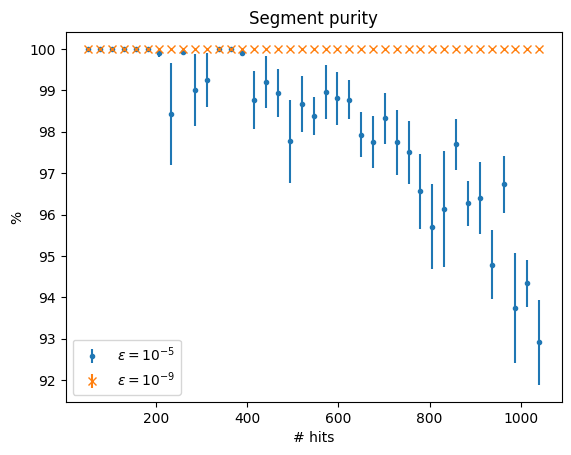

In [77]:
plt.errorbar([np.mean(r.hits) for r in runs_5], [np.mean(r.precisions)*100 for r in runs_5], [np.std(r.precisions)*100/(SHOTS_PER_RUN)**0.5 for r in runs_5], linestyle='None', marker='.', label="$\\epsilon = 10^{-5}$")
plt.errorbar([np.mean(r.hits) for r in runs_9], [np.mean(r.precisions)*100 for r in runs_9], [np.std(r.precisions)*100/(SHOTS_PER_RUN)**0.5 for r in runs_9], linestyle='None', marker='x', label="$\\epsilon = 10^{-9}$")
plt.title("Segment purity")
plt.xlabel("# hits")
plt.ylabel("%")
plt.legend()

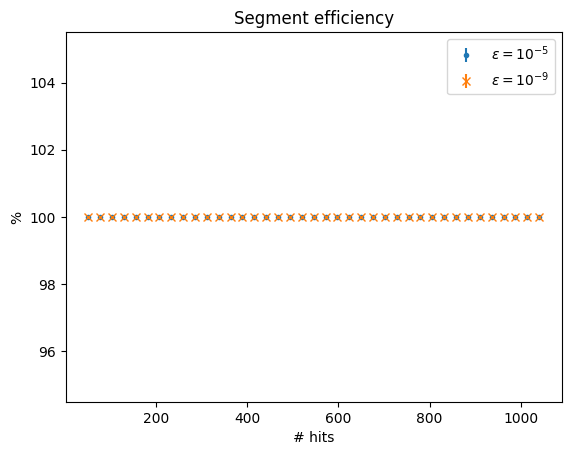

In [78]:
plt.errorbar([np.mean(r.hits) for r in runs_5], [np.mean(r.recalls)*100 for r in runs_5], [np.std(r.recalls)*100/(SHOTS_PER_RUN)**0.5 for r in runs_5], linestyle='None', marker='.', label="$\\epsilon = 10^{-5}$")
plt.errorbar([np.mean(r.hits) for r in runs_9], [np.mean(r.recalls)*100 for r in runs_9], [np.std(r.recalls)*100/(SHOTS_PER_RUN)**0.5 for r in runs_9], linestyle='None', marker='x', label="$\\epsilon = 10^{-9}$")
plt.title("Segment efficiency")
plt.xlabel("# hits")
plt.ylabel("%")
plt.legend()